# Customer Churn Analysis Portfolio

## Overview

This portfolio project explores customer churn behavior using the **Churn Modelling Dataset**.  
By applying **Exploratory Data Analysis (EDA)** with Python libraries such as `pandas`, `seaborn`, and `matplotlib`, the goal is to uncover patterns and key factors that contribute to customer attrition in the banking sector.

The analysis supports data-driven strategies to improve customer retention and engagement.

---

## Objectives

- Understand characteristics of churned customers
- Analyze relationships between demographic and behavioral features with churn
- Identify insights to help reduce customer attrition

---

## Techniques Used

- Data cleaning and preprocessing
- Categorical and numerical analysis
- Count plots, histograms, box plots, and KDE plots
- Feature engineering (e.g., credit score grouping)
- Visual storytelling

---

## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Content

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Processing

In [5]:
print('Thong tin mo ta cua dataset:')
print(df.info())

print('---')

print('So luong dong va cot:')
print(df.shape)

print('---')

print('Cac cot trong dataset:')
print(df.columns)

Thong tin mo ta cua dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
---
So luong dong va cot:
(10000, 14)
---
Cac cot trong data

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Analysis ETA

In [9]:
df_customer_churn= df[df['Exited']==1]

In [10]:
df_customer_churn['Geography'].value_counts()

Geography
Germany    814
France     810
Spain      413
Name: count, dtype: int64

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\971261043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_customer_churn


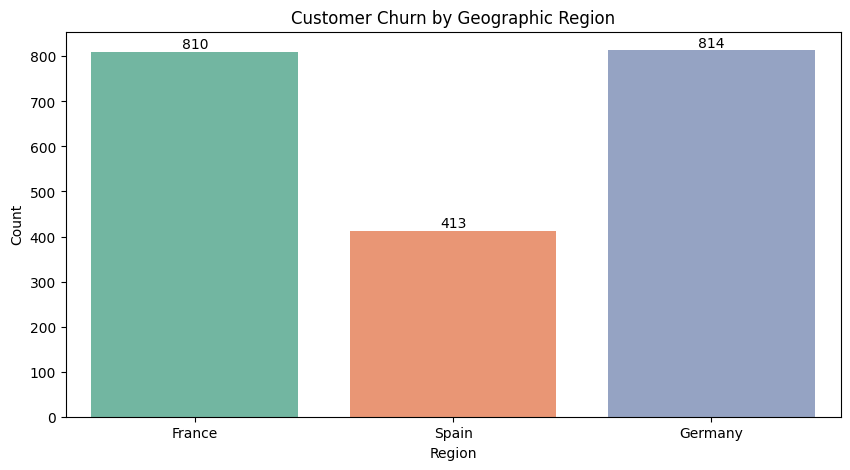

In [11]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(data=df_customer_churn
                   , x='Geography'
                   , palette = 'Set2')

for p in ax.containers:
    ax.bar_label(p)

plt.title('Customer Churn by Geographic Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The number of customers who churned in `France` and `Germany` is nearly the same, accounting for approximately **39.76%**, and is higher than in `Spain`, which accounts for **20.48%**.
→ This suggests that customer retention strategies may need to be **tailored by region** to address specific customer behaviors or expectations.

In [12]:
if 'RowNumber' in df_customer_churn.columns:
    df_customer_churn.drop('RowNumber', axis=1, inplace=True)
df.head()

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\2606678285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_churn.drop('RowNumber', axis=1, inplace=True)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


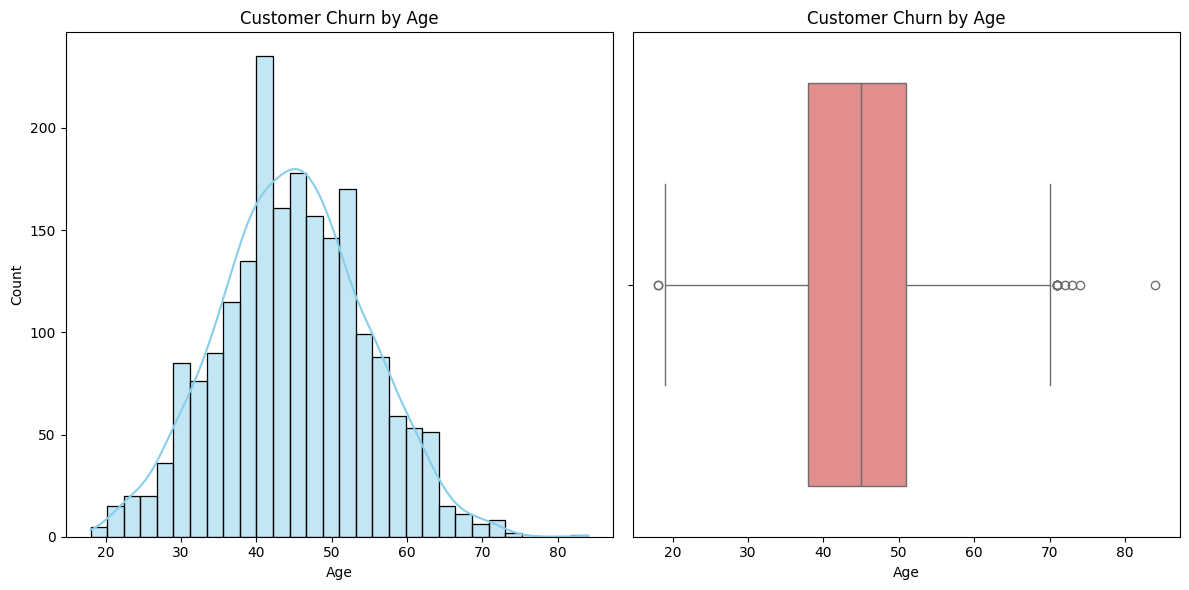

In [13]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_customer_churn, x="Age", kde=True, bins=30, color='skyblue')
plt.title("Customer Churn by Age")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_customer_churn, x="Age", color='lightcoral')
plt.title("Customer Churn by Age")

plt.tight_layout()
plt.show()

The majority of customer churn is concentrated in the **40–52 age range**.


In [14]:
def score_group(score):
    if score < 450:
        return '350-450'
    elif score < 550:
        return '450-550'
    elif score < 650:
        return '550-650'
    elif score < 750:
        return '650-750'
    else:
        return '750-850'
df_customer_churn['CreditScoreGroup'] = df_customer_churn['CreditScore'].apply(score_group)
df_customer_churn.head()

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\1766043690.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_churn['CreditScoreGroup'] = df_customer_churn['CreditScore'].apply(score_group)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,550-650
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,450-550
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,550-650
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,350-450
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,650-750


C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\2238271500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_customer_churn


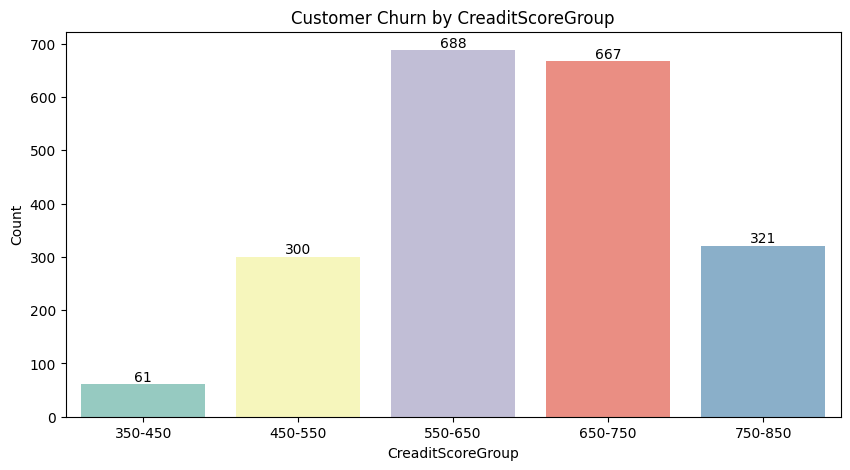

In [15]:
plt.figure(figsize=(10, 5))
order = ['350-450', '450-550', '550-650', '650-750', '750-850']
ax = sns.countplot(data=df_customer_churn
                   , x='CreditScoreGroup'
                   , palette = 'Set3', order = order)

for p in ax.containers:
    ax.bar_label(p)

plt.title('Customer Churn by CreaditScoreGroup')
plt.xlabel('CreaditScoreGroup')
plt.ylabel('Count')
plt.show()

Most customer churn falls within the **Credit Score range of 550–750**, while the **350–450 range** has the **lowest churn rate**.

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\2776682429.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


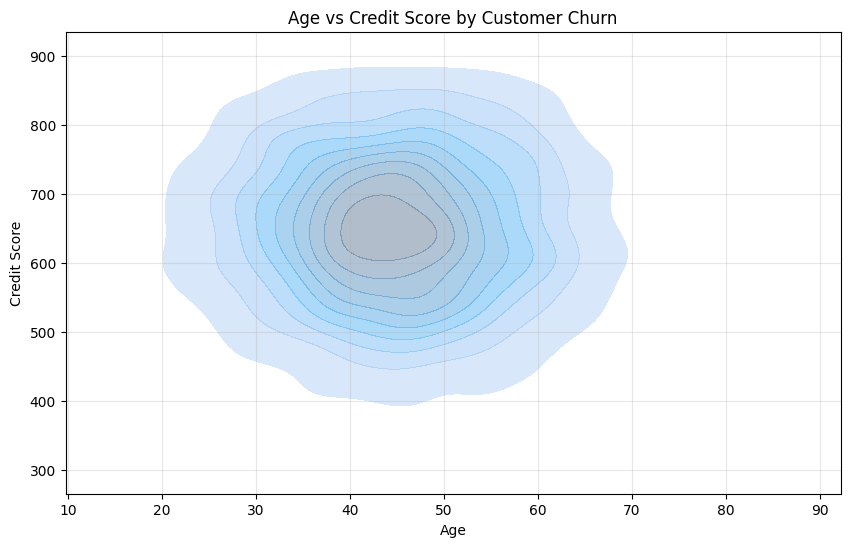

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_customer_churn,
    x='Age',
    y='CreditScore',
    fill=True,
    alpha=0.4,
    common_norm=False,
    palette='Set1'
)

plt.title('Age vs Credit Score by Customer Churn')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(alpha=0.3)
plt.show()



Customers are most concentrated in the **age range of 40–50** with a **credit score around 650–700**.

The outer density areas extend to **younger ages (20–30)** and **older ages (60+)**, but the density gradually decreases in these ranges.


C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\2248158137.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df_customer_churn


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

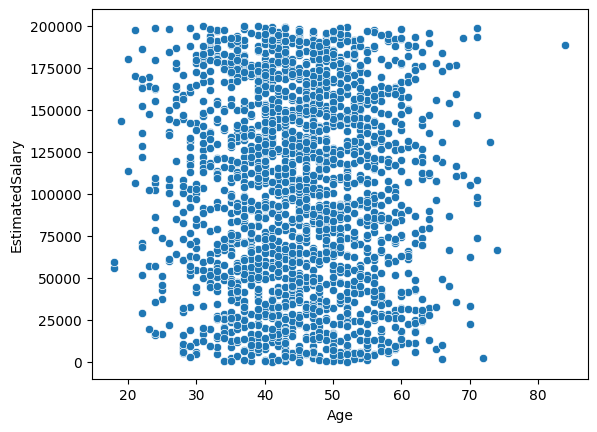

In [17]:
sns.scatterplot(data = df_customer_churn
                , x = 'Age'
                , y = 'EstimatedSalary'
                ,palette = 'Set2')

**1. Most customers use 1–2 products**  
The largest density area is at **NumOfProducts = 1 and 2**, spreading across various **Tenure** levels.  
→ This represents the **most common customer group** of the bank.

**2. Long-term customers still use few products**  
At **NumOfProducts = 1**, **Tenure** ranges from **2 to 10 years**.  
→ Indicates that some customers remain **loyal over time** despite using few products → potential **upsell opportunity**.

**3. Few customers use 3–4 products**  
In the area of **NumOfProducts = 3 or 4**, the **contours are sparse and small** → indicating **very few customers** in this group.


**1. Most customers use 1–2 products**  
The largest density area is at **NumOfProducts = 1 and 2**, spreading across various **Tenure** levels.  
→ This represents the **most common customer group** of the bank.

**2. Long-term customers still use few products**  
At **NumOfProducts = 1**, **Tenure** ranges from **2 to 10 years**.  
→ Indicates that some customers remain **loyal over time** despite using few products → potential **upsell opportunity**.

**3. Few customers use 3–4 products**  
In the area of **NumOfProducts = 3 or 4**, the **contours are sparse and small** → indicating **very few customers** in this group.


C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\3234696842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_customer_churn


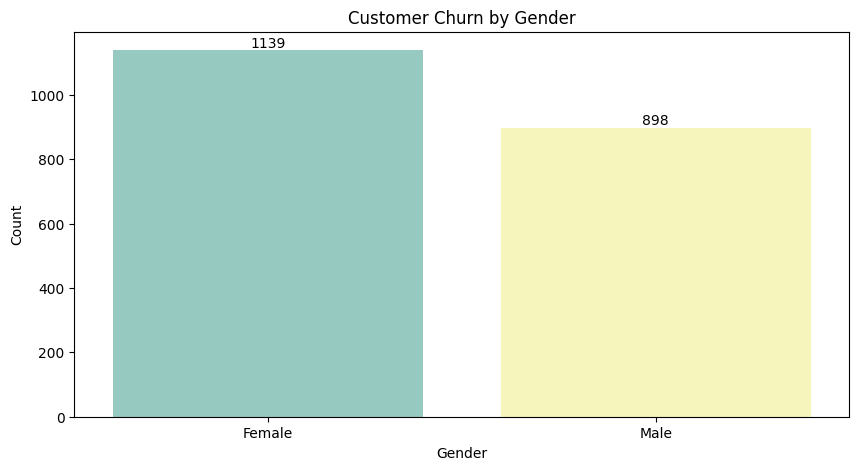

In [18]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_customer_churn
                   , x='Gender'
                   , palette = 'Set3')

for p in ax.containers:
    ax.bar_label(p)

plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The number of **female customers who churned** is **1.2 times higher** than that of **male customers**.

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\518668542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_customer_churn


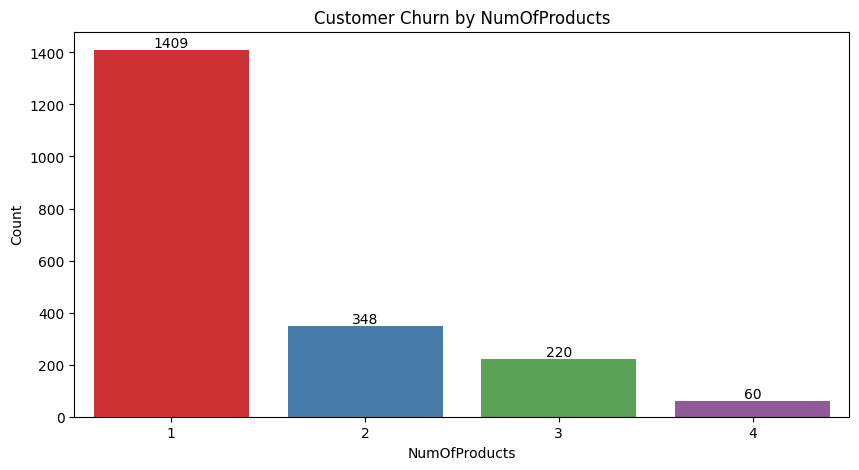

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_customer_churn
                   , x='NumOfProducts'
                   , palette = 'Set1')

for p in ax.containers:
    ax.bar_label(p)

plt.title('Customer Churn by NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

Most **churned customers** used only **1** product.  
The **more products** a customer uses, the **lower the churn rate**.

-->This suggests the need for **strategies to encourage customers to explore and use more banking products**.

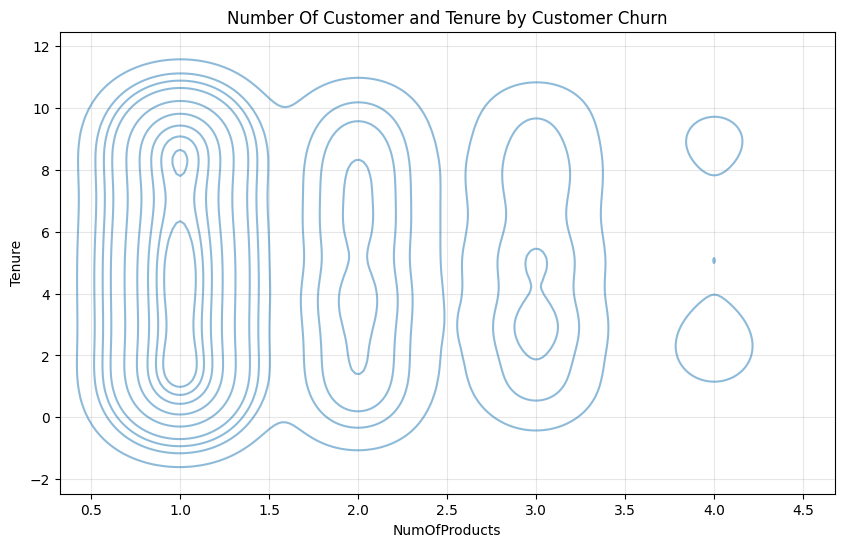

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_customer_churn, x='NumOfProducts', y='Tenure', alpha=0.5)
plt.grid(alpha=0.3)
plt.title('Number Of Customer and Tenure by Customer Churn')
plt.show()

1. **Most customers have 1 or 2 products**  
The two largest density areas are located at:  
- **NumOfProducts ≈ 1** with **Tenure ranging from 2–10 years**  
- **NumOfProducts ≈ 2** with **Tenure from 1–8 years**  

→ This is the **typical customer segment**: using **1–2 products over several years**.

2. **Few customers use 3 or 4 products**  
The **contours at NumOfProducts = 3 and 4** are **small and scattered**, indicating **very few customers** in this group.

→ **The number of years a customer stays (Tenure) does not significantly impact their decision to churn**.  
Instead, **the number of products used is the key factor** influencing customer retention.

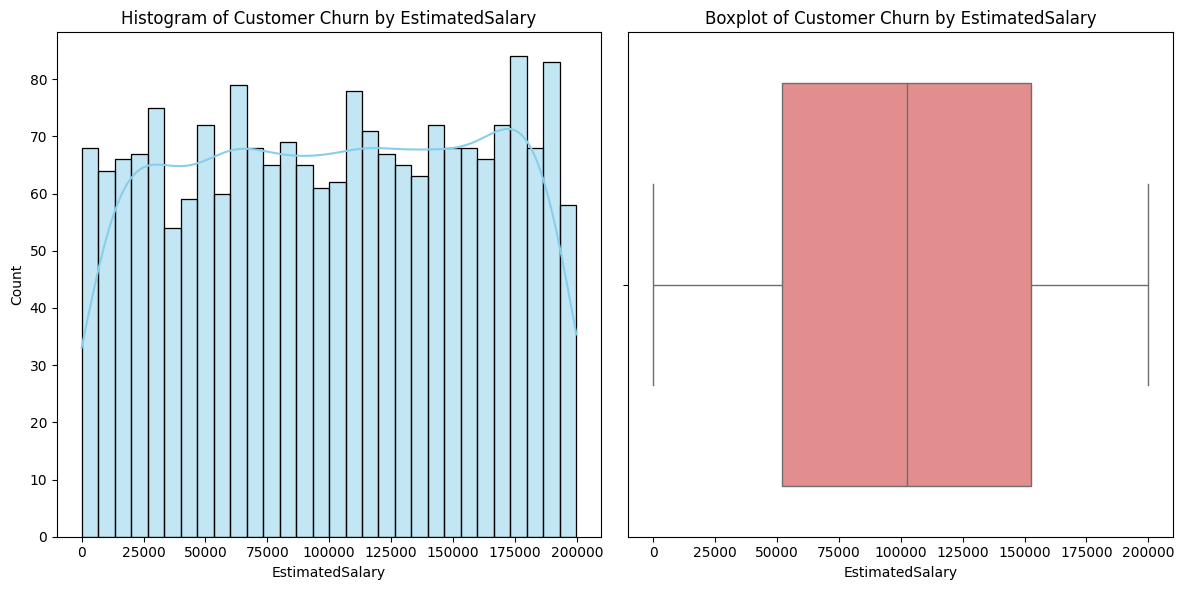

In [21]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_customer_churn, x="EstimatedSalary", kde=True, bins=30, color='skyblue')
plt.title("Histogram of Customer Churn by EstimatedSalary")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_customer_churn, x="EstimatedSalary", color='lightcoral')
plt.title("Boxplot of Customer Churn by EstimatedSalary")

plt.tight_layout()
plt.show()

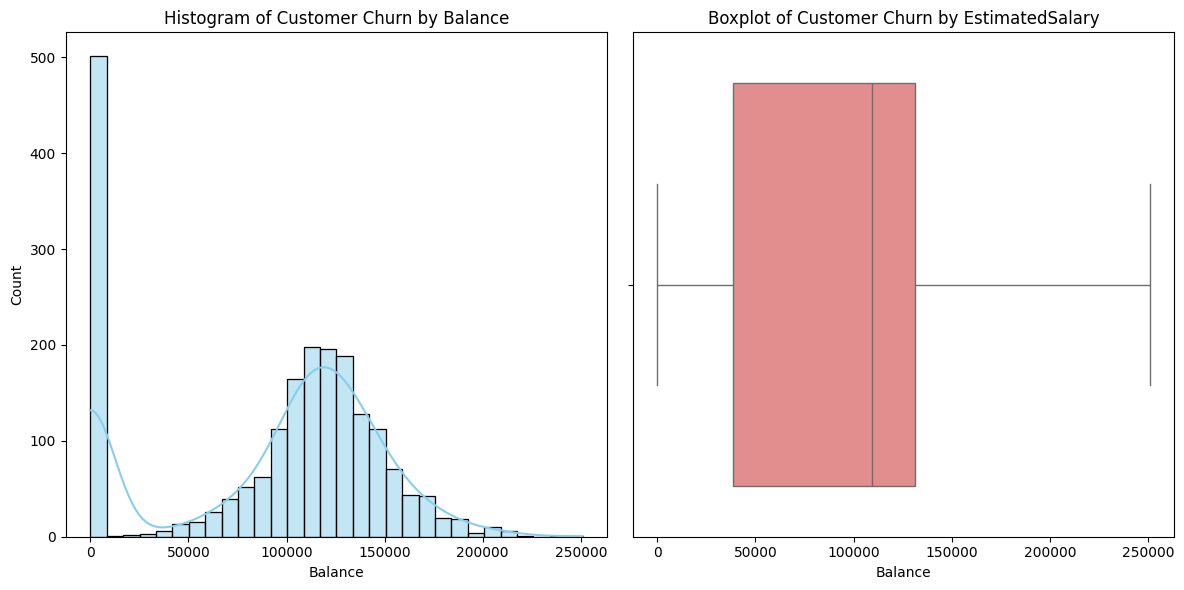

In [22]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_customer_churn, x="Balance", kde=True, bins=30, color='skyblue')
plt.title("Histogram of Customer Churn by Balance")
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_customer_churn, x="Balance", color='lightcoral')
plt.title("Boxplot of Customer Churn by EstimatedSalary")


plt.tight_layout()
plt.show()

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\2062975433.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df_customer_churn


Text(0.5, 1.0, 'Age and Balance by Customer Churn')

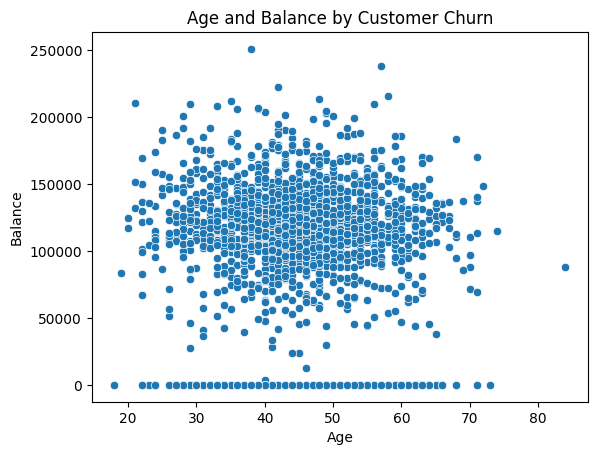

In [28]:
sns.scatterplot(data = df_customer_churn
                , x = 'Age'
                , y = 'Balance'
                ,palette = 'Set2')
plt.title("Age and Balance by Customer Churn")

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\2489116426.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df_customer_churn


Text(0.5, 1.0, 'Balance and Salary by Customer Churn')

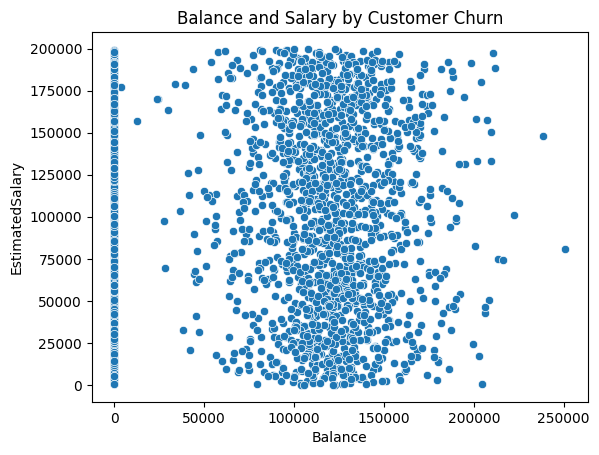

In [29]:

sns.scatterplot(data = df_customer_churn
                , x = 'Balance'
                , y = 'EstimatedSalary'
                ,palette = 'Set2')
plt.title("Balance and Salary by Customer Churn")

Customers with **account balances is 0** make up the **largest group** of churned users.  
This is considered an **outlier**, as customers typically **withdraw all their funds before leaving**.

Aside from this exception, most churned customers have **balances between $110,000 and $130,000**.

C:\Users\Vo-Tu-Nhi\AppData\Local\Temp\ipykernel_13920\2332620521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_customer_churn


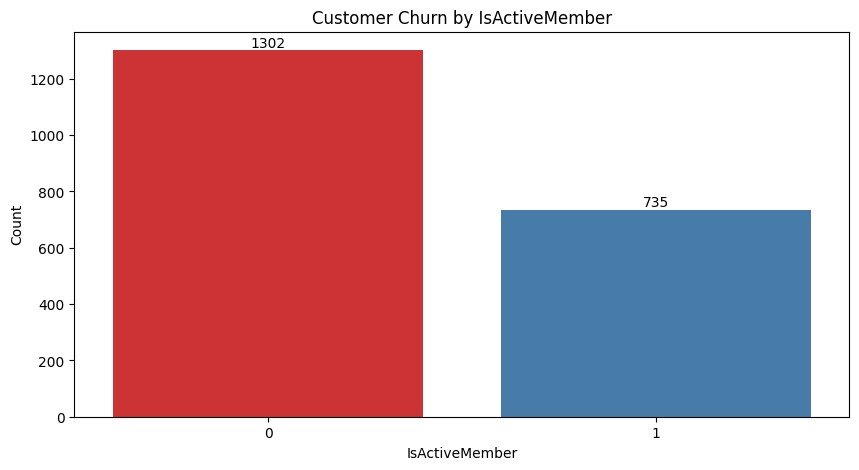

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_customer_churn
                   , x='IsActiveMember'
                   , palette = 'Set1')

for p in ax.containers:
    ax.bar_label(p)

plt.title('Customer Churn by IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.show()

Customers who are **inactive** are **twice as likely to churn** compared to those who are **actively using their accounts**.  
When customers **frequently use their accounts** for various purposes, they tend to **stick with the same account** for convenience and ease of use.

→ There is a need to **encourage regular account activity**, such as:  
- Improving the **usability of banking apps**  
- Offering **discount codes or promotions** for payments made through bank accounts


## Key Findings

- Customers using only **1 product** have the highest churn rate
- **Inactive customers** are **twice as likely** to churn compared to active ones
- **Tenure (years with the bank)** has limited impact on churn
- Majority of churned customers are aged **40–52** with credit scores in the range **550–750**
- Churn rates are highest in **France and Germany**, and lowest in **Spain**
- Many churned customers had an account balance of **$0**, indicating full withdrawal before leaving
- Customers with **higher engagement and more products** are less likely to churn

## Conclusion

Customer churn is strongly associated with **low product usage** and **inactivity**.  
To reduce churn, banks should consider:

- Encouraging customers to adopt more products and services
- Improving digital experience (e.g., app usability)
- Providing incentives for active usage (e.g., promotions, discounts)
- Tailoring strategies based on regional and demographic insights

This project demonstrates how **EDA and visualization** can reveal actionable insights to support smarter customer retention strategies.

---


## Recommendations

Based on the analysis, the following strategies are recommended to reduce customer churn and improve retention:

### 1. Promote Product Cross-Selling
Encourage customers to use more than one banking product.  
- Launch bundled service packages (e.g., savings + credit card)
- Provide personalized product suggestions based on customer profiles
- Offer small incentives or cashback for trying new services

### 2. Increase Customer Engagement
Inactive customers are twice as likely to churn.  
- Send regular account usage summaries to encourage interaction
- Improve user experience on mobile apps and online platforms
- Introduce gamification (e.g., milestone rewards) to increase usage frequency

### 3. Improve Retention in High-Churn Regions
France and Germany have the highest churn rates.  
- Conduct regional satisfaction surveys to understand pain points
- Offer localized promotions or customer service improvements
- Tailor communication style and channels for each region

### 4. Target At-Risk Segments
Focus on customers who are:
- Using only 1 product
- Inactive for long periods
- Aged 40–52 with low-to-mid credit scores
→ These groups should be prioritized for loyalty programs or proactive outreach

### 5. Use Predictive Models for Early Detection
Develop machine learning models using features like product count, balance, activity status, and tenure to:
- Predict high-risk customers
- Trigger early interventions (e.g., personalized offers, calls from relationship managers)

By implementing these strategies, banks can not only reduce churn but also enhance long-term customer lifetime value (CLV).
